In [1]:
pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
transform = transforms.Compose([
    transforms.Grayscale(),  # Gri tonlama, MNIST veri seti zaten gridir, sadece bu formatta olmasını garanti eder.
    transforms.Resize((28, 28)),  # Boyutlandırma, MNIST veri setindeki her görüntü zaten bu boyuttadır, sadece modelin giriş boyutunu standart hale getirmek için.
    transforms.ToTensor(),  # Tensor'a çevirme, modeli eğitmek ve değerlendirmek için gereklidir.
    transforms.Normalize((0.5,), (0.5,))  # Normalizasyon, her pikselin değerini ortalaması 0.5 ve standart sapması 0.5 olacak şekilde ayarlar, daha hızlı ve iyi çalışması için.
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True) # train=True, eğitim verisini..
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True) # .. train=False, test veri setini yükler.

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True) # batch_size=64, model her seferinde 64 görüntü alacaktır. shuffle=True, modelin daha iyi genelleştirme yapmasına yardım eder.
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False) # test için farklıdır, false olması, sonuçların tutarlılığı korunması içindir.

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 35.3MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.14MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.1MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.24MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1) # padding=1, giriş görüntüsünün boyutunu korumak için kenarlara 1 piksel padding eklenir
        # gri tonlama görüntülüeri olduğu için giriş kanalı 1 dir, rgb gibi renkli görüntü olsaydı giriş kanalı 3 olacaktı.
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128) # nn.Linear, tam bağlantılı katman tanımlar, girişteki her nöronun çıkıştaki her nöronla bağlantılı olduğu anlamına gelir.
        # Bu katman, giriş verilerini daha yüksek seviyeli özelliklere dönüştürmek adına kullanılır. Görüntü boyutu  7x7 e düşer.
        self.fc2 = nn.Linear(128, 10)  # 10 sınıf, 0-9 rakamları için.

    def forward(self, x):
        x = F.relu(self.conv1(x)) # 28x28
        x = F.max_pool2d(x, 2) # 14x14, her 2x2 bölgedeki en yüksek değeri alarak boyutu yarıya indirir.
        x = F.relu(self.conv2(x)) # 16x16
        x = F.max_pool2d(x, 2) # 8x8
        x = x.view(-1, 64 * 7 * 7)  # Düzleştirme, -1, PyTorch un otomatik olarak uygun boyutu hesaplamasına olanak tanır.
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [5]:
model = SimpleCNN()
criterion = nn.CrossEntropyLoss() # çok sınıflı sınıflandırma problemleri adına kullanılan bir kayıp fonksiyonudur. Modelin tahminleri ile gerçek etiketler arasındaki farkı ölçer.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)  # Modelden tahmin yapar.
        loss = criterion(outputs, labels)  # Kayıp hesaplama, outputs = tahmin, labels = gerçek etiketler.
        loss.backward()  # kayıp fonksiyonunun gradyanlarını hesaplar. Ağırlık güncellemesi için gereçkli gradyanları sağlar.
        optimizer.step()  # Ağırlıkları güncellemesi.

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/5], Loss: 0.0051
Epoch [2/5], Loss: 0.0090
Epoch [3/5], Loss: 0.0167
Epoch [4/5], Loss: 0.0213
Epoch [5/5], Loss: 0.0259


In [6]:
model.eval()
correct = 0 # doğru tahmin edilen örneklerin sayısını tutar.
total = 0 # toplam test örneklerinin sayısını tutar.

with torch.no_grad(): # gradyan hesaplamasını kapatır, hesaplamamıza gerek yok.
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1) # torch.max(outputs.data, 1), modelin tahminleri arasından en yüksek değere sahip olan sınıfı bulur. 1,
        # her bir görüntü için en yüksek değeri bulmak için sütunlar boyunca işlem yapar. predicted, her görüntü için tahmin edilen sınıf etiketlerini içerir.
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 98.87%


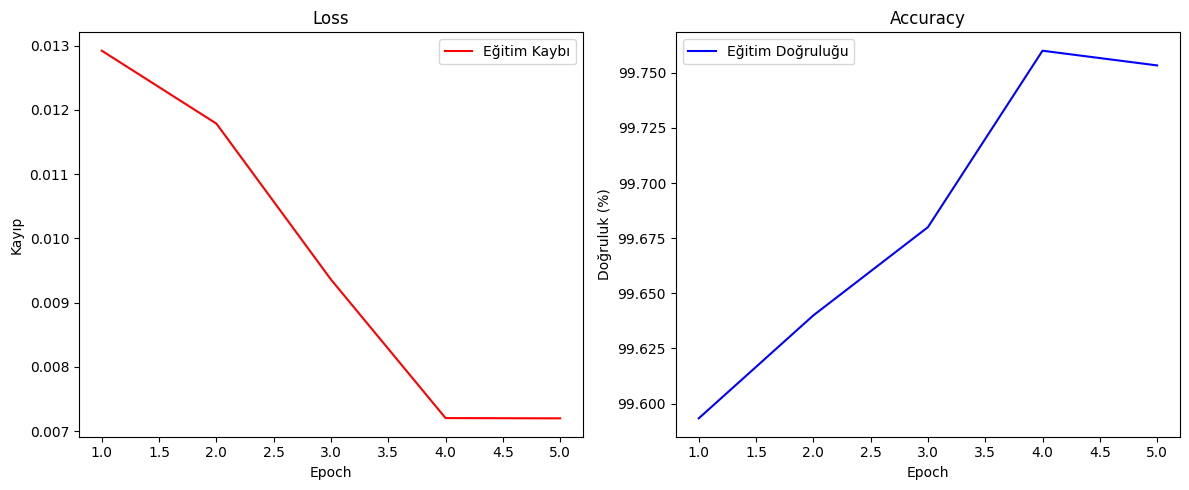

In [7]:
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0 # mevcut epoch taki toplam kaybı tutması için.
    correct = 0
    total = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1) # 1, her görüntü için sınıflar arasından maksimum değeri bulmak için kullanılır.
        # _ ifadesi, maksimum değerleri almak istemediğimiz için kullanılır. Sadece indeksleri saklamak istiyoruz.
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Eğitim Kaybı', color='red')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Eğitim Doğruluğu', color='blue')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk (%)')
plt.legend()

plt.tight_layout()
plt.show()

Gerçek Etiketler:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3]
Tahmin Edilen Etiketler:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3]


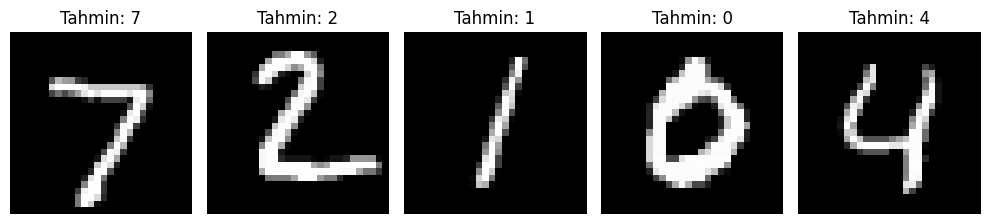

In [8]:
model.eval()
sample_images, sample_labels = next(iter(test_loader))
outputs = model(sample_images)

_, predicted = torch.max(outputs.data, 1)

print("Gerçek Etiketler: ", sample_labels.numpy())
print("Tahmin Edilen Etiketler: ", predicted.numpy())

import numpy as np

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1) # 1 satırlı, 5 sütunlu, i+1 her bir alt grafiğin konumunu belirmesi için.
    plt.imshow(sample_images[i][0], cmap='gray')
    plt.title(f'Tahmin: {predicted[i].item()}')
    plt.axis('off') # Eksenleri kapatır, ve sadece görüntü görünür.

plt.tight_layout()
plt.show()

**Modelin Güçlü ve Zayıf Yönleri ile Geliştirme Önerileri**

Güçlü Yönler:

- PyTorch kullanımı

- Veri seti **transforms.Grayscale()**, **transforms.Resize()**, **transforms.ToTensor()** ve **transforms.Normalize()** gibi adımları kullanarak hazırlanması

- MNIST veri seti kullanımı


Zayıf Yönler:

- Veri setinin yüklenmesi sırasında olası hatalar için try-except blokları bulunabilir

- Modelde dropout veya veri artırma yöntemleri kullanılabilir, kullanılmaması aşırı öğrenmeye neden olabilir

- Modelin eğitimi sonrası detaylı bir hata analizi veya sınıf bazlı doğruluk raporu bulunabilir. **torch.optim.lr_scheduler** kullanılarak eğitim sürecinde öğrenme oranı ayarlanabilir

- Öğrenme oranı zamanla değiştirilmediği için eğitim süreci durağan kalabilir. **classification_report** veya **confusion_matrix** kullanılarak hata analizi yapılabilir